In [3]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np
import glob

In [90]:
tabledir = '/Users/k215c316/Virgo/v0-03Jul2020/'

In [91]:
mgstab = Table.read(tabledir+'vf_north_v0_z0mgs.fits')

Text(0.5, 1.0, 'RA & DEC of VF Galaxies (Leroy+2019)')

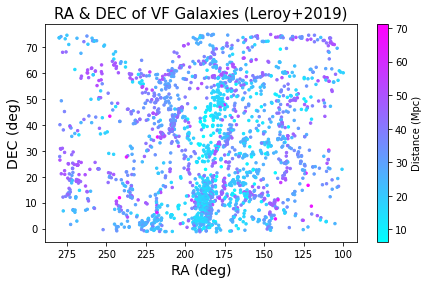

In [4]:
plt.figure(figsize=(7,4))
plt.scatter(mgstab['ra'],mgstab['dec'],c=mgstab['dist_mpc'],cmap='cool',s=6)
cb = plt.colorbar()
cb.set_label('Distance (Mpc)')
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.title('RA & DEC of VF Galaxies (Leroy+2019)',fontsize=15)

## -----------------------------------------------------------

Below contains Mstar - SFR plots for VF catalogs (D25 from Main catalog, SFR & Mstar data from Leroy+2019 data). 

1. Mstar-SFR color-coded by D25
    -try converting D25 to linear (not log), search for D25 about 70+ arcsec (since W3 FWHM is ~6.5 arcsec)
    -vmin 6.5/2 ("minimally" resolved), vmax 70 arcsec ("maximally" resolved)
2. Mstar-SFR color-coded by WISE Ch.3 SNR
    -search for SNR > 30 (vmin 0, vmax ~200)
3. Select subset of ~100 galaxies with resolved D25 at W3 resolution (10x 6.5 arcsec) and SNR(W3)>30

***UPDATE --> HAVE NOW CHANGED THE D25 AND SNR PARAMETERS FOR COLORBAR PURPOSES

***Match entries with DR8 catalog; use Legacy Survey viewer to ensure WISE image is clean, centered, and isolated***

In [5]:
os.listdir(tabledir)

['filament_memberships.png',
 'vf_north_v0_nsa_v0_bellmasses.fits',
 'galaxy_sample_prop_HI.fits',
 'vf_north_v0_z0mgs.fits',
 'galaxy_sample_prop_IRAM30m.fits',
 'vf_north_v0_a100_sdssphot.fits',
 'vf_north_v0_hyperleda.fits',
 'vf_north_v0_groups.fits',
 'vf_north_v0_nsa_v0.fits',
 'galaxy_sample_prop_COliterature.fits',
 'vf_north_v0_steer17.fits',
 'README',
 'vf_north_v0_ha.fits',
 'vf_north_v0_main_env_prop_H0_74_0.fits',
 'README_vf_north_v0_main_filament_membership.txt',
 'vf_north_v0_main.fits',
 'vf_north_v0_main_unwise.fits',
 'galaxy_sample_prop_general.fits',
 'virgo_v0_allwise_10arcsec.tbl',
 'vf_north_v0_sfr.fits',
 'vf_north_v0_nsa_bellmasses.fits',
 'vf_north_v0_co.fits',
 'vf_north_v0_a100.fits',
 'vf_north_v0_a100_unwise.fits',
 'vf_north_v0_nsa.fits',
 'vf_north_v0_main_filament_membership.fits',
 'ASTR-792']

In [6]:
hyptab = tabledir+'vf_north_v0_hyperleda.fits'
hyptab = Table.read(hyptab)

Text(0.5, 1.0, 'SFR v. Mstar')

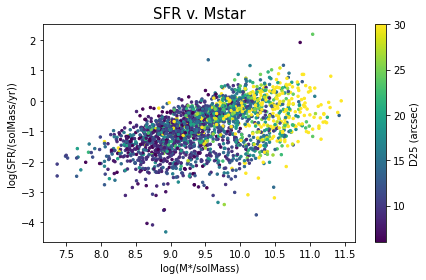

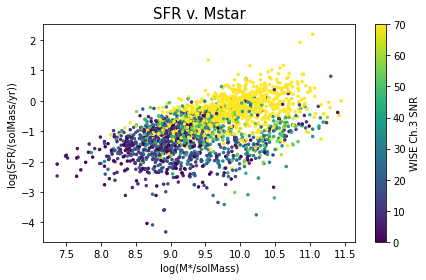

In [9]:
Mstar = mgstab['logmass']  #x axis
SFR = mgstab['logsfr']   #y axis; frequently deriven from WISE C4 data
D25 = 10**(hyptab['logd25'])

plt.figure(figsize=(7,4))
plt.scatter(Mstar,SFR,c=D25,vmin=6,vmax=30,s=6)
cb = plt.colorbar()
cb.set_label('D25 (arcsec)')
plt.xlabel('log(M*/solMass)')
plt.ylabel('log(SFR/(solMass/yr))')
plt.title('SFR v. Mstar', fontsize=15)

snr = mgstab['flux_wise3']/mgstab['std_flux_wise3']

plt.figure(figsize=(7,4))
plt.scatter(Mstar,SFR,c=snr,vmin=0,vmax=70,s=6)
cb2 = plt.colorbar()
cb2.set_label('WISE Ch.3 SNR')
plt.xlabel('log(M*/solMass)')
plt.ylabel('log(SFR/(solMass/yr))')
plt.title('SFR v. Mstar', fontsize=15)

#mgs table:
#flux_wise3/std_flux_wise3 = SNR


## Flag Demonstration (with bools!)

    a = np.arange(10)
    b = a+5
    bool_gt5 = (a>5) & (b>5)
    bool_gt5

In [10]:
#a[bool_gt5]

In [11]:
bool_or = (a>5) | (b<10)
bool_or

NameError: name 'a' is not defined

In [12]:
#extract a sample of about 100 galaxies...
#initial attempt yielded ~1000 (with d25>4 and snr>30); now using larger values to better constrain data

d25_flag = ((10**(hyptab['logd25'])) > 50)
snr_flag = ((mgstab['flux_wise3']/mgstab['std_flux_wise3'])>65)
gal_flag = d25_flag & snr_flag

Text(0.5, 1.0, 'SFR v. Mstar')

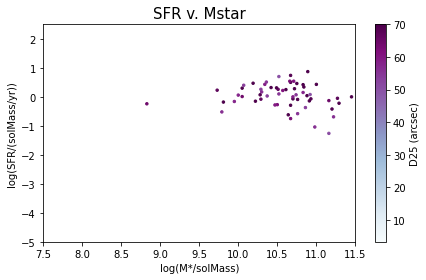

In [13]:
gal_flag
plt.figure(figsize=(7,4))
plt.scatter(Mstar[gal_flag],SFR[gal_flag],c=D25[gal_flag],vmin=3.25,vmax=70,cmap='BuPu',s=6)
cb = plt.colorbar()
cb.set_label('D25 (arcsec)')
plt.xlim(7.5,11.5)
plt.ylim(-5,2.5)
plt.xlabel('log(M*/solMass)')
plt.ylabel('log(SFR/(solMass/yr))')
plt.title('SFR v. Mstar', fontsize=15)

Text(0.5, 1.0, 'RA & DEC of VF Galaxies (Leroy+2019)')

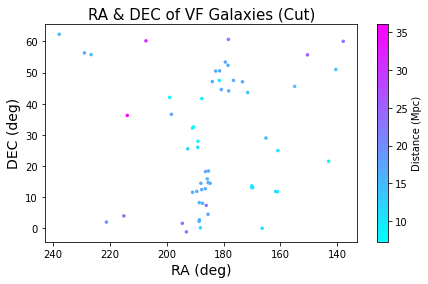

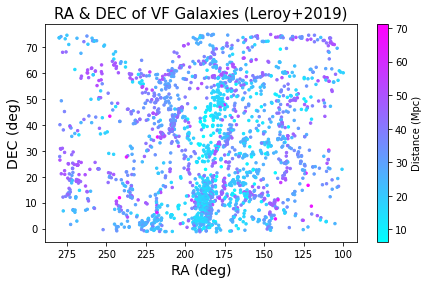

In [14]:
plt.figure(figsize=(7,4))
plt.scatter(mgstab['ra'][gal_flag],mgstab['dec'][gal_flag],c=mgstab['dist_mpc'][gal_flag],cmap='cool',s=6)
cb = plt.colorbar()
cb.set_label('Distance (Mpc)')
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.title('RA & DEC of VF Galaxies (Cut)',fontsize=15)

plt.figure(figsize=(7,4))
plt.scatter(mgstab['ra'],mgstab['dec'],c=mgstab['dist_mpc'],cmap='cool',s=6)
cb = plt.colorbar()
cb.set_label('Distance (Mpc)')
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.title('RA & DEC of VF Galaxies (Leroy+2019)',fontsize=15)

In [15]:
len(hyptab[gal_flag]) #relative to 6860 of unflagged sample size

59

In [16]:
from astropy.io import ascii
from astropy.io import fits

In [17]:
hyp = hyptab[gal_flag]
#hyp.write('sample_hyp.fits')

In [20]:
z0mgs = mgstab[gal_flag]
#z0mgs.write('sample_mgs.fits')

In [21]:
maintab = Table.read(tabledir+'vf_north_v0_main.fits')
main = maintab[gal_flag]
#main.write('sample_main.fits')

In [22]:
#GALFIT candidates --> observations with LegacySurvey "WISE 12-micron dust map" filter; "excluded" galaxies are
#selecteded if they either intersected a nearby galaxy, were superimposed by a foreground star, or appeared "noisy"

-------

------------

-----------

# Updated Table (v1)

Apply SNR (12-micron) cut from ADAP proposal (>20) and:
1. Show sample in SFR-Mstar plane
2. Show optical size distribution (hist?) of full catalog and galaxies retained with the aforementioned cut
3. Show RA-DEC distribution of full catalog and galaxies retained with aforementioned cut

In [4]:
#updated (v1) length of sample: 6797

homedir = os.getenv("HOME")
tabledir = homedir+'/Desktop/v1-20210308/'

vfmain = Table.read(tabledir+'vf_north_v1_main.fits')
hyptab = Table.read(tabledir+'vf_north_v1_hyperleda.fits')
mgstab = Table.read(tabledir+'vf_north_v1_z0mgs.fits')
unwise_tab = Table.read(tabledir+'vf_north_v1_unwise.fits')
envtab = Table.read(tabledir+'/vf_north_v1_main_envsummary_Kourkchi.fits')

snr_w3 = unwise_tab['w3_nanomaggies']/np.sqrt(unwise_tab['w3_nanomaggies_ivar'])
snr_w3_flag = (snr_w3 >= 20)

#sample cuts with snr_w3_flag
vfmain_cut = vfmain[snr_w3_flag]
hyptab_cut = hyptab[snr_w3_flag]
mgstab_cut = mgstab[snr_w3_flag]

In [8]:
#n=0
#for i in snr_w3[0:451]:
#    print(vfmain['VFID'][n],i)
#    n+=1

In [3]:
print(len(unwise_tab[snr_w3_flag]))

4554


In [4]:
#THE ARCHIVES ARE INCOMPLETE. MANY NANS.

flag_test_w3 = []      #for later
num_nan_w3 = 0
for i in unwise_tab['w3_nanomaggies']:
    if str(np.min(unwise_tab['w3_nanomaggies'])) == str(i):
        num_nan_w3 += 1
        flag_test_w3.append(0)
    else:
        flag_test_w3.append(1)
print('w3 num_nan for full sample:',num_nan_w3)



num_nan_mass = 0
for i in mgstab['logmass']:
    if str(np.min(mgstab['logmass'])) == str(i):
        num_nan_mass += 1

print('Mstar num_nan for full sample:',num_nan_mass)



num_nan_sfr = 0
for i in mgstab['logsfr']:
    if str(np.min(mgstab['logsfr'])) == str(i):
        num_nan_sfr += 1

print('SFR num_nan for full sample:',num_nan_sfr)



num_nan_d25 = 0
for i in hyptab['logd25']:
    if str(np.min(hyptab['logd25'])) == str(i):
        num_nan_d25 += 1

print('d25 num_nan for full sample:',num_nan_d25)

w3 num_nan for full sample: 671
Mstar num_nan for full sample: 4422
SFR num_nan for full sample: 4532
d25 num_nan for full sample: 904


In [5]:
print('total number of galaxies with snr data:',len(unwise_tab) - num_nan_w3)
print('total number of galaxies with Mstar data:',len(mgstab) - num_nan_mass)
print('total number of galaxies with d25 data:',len(hyptab) - num_nan_d25)
print('total number of galaxies with sfr data:',len(mgstab) - num_nan_sfr)

print('total number of galaxies in sample:',len(unwise_tab))

total number of galaxies with snr data: 6126
total number of galaxies with Mstar data: 2375
total number of galaxies with d25 data: 5893
total number of galaxies with sfr data: 2265
total number of galaxies in sample: 6797


Percentage of subsample relative to total sample (no cuts): 67.00%


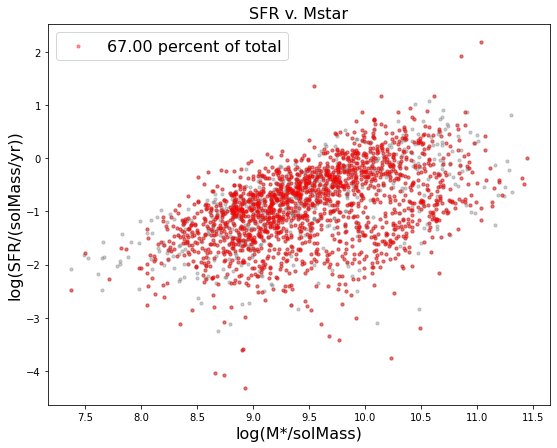

In [6]:
#considering the entire sample...no cuts according to nan's.

Mstar = mgstab['logmass']  #x axis
SFR = mgstab['logsfr']   #y axis; frequently deriven from WISE C4 data
D25 = 10**(hyptab['logd25'])
plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=.4)

Mstar_cut = mgstab_cut['logmass']
SFR_cut = mgstab_cut['logsfr']
D25_cut = 10**(hyptab_cut['logd25'])
plt.scatter(Mstar_cut,SFR_cut,s=10,color='red',alpha=0.4,label='%.2f percent of total'%(len(Mstar_cut)/len(Mstar)*100))
plt.legend(fontsize=16)
plt.xlabel('log(M*/solMass)',fontsize=16)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=16)
plt.title('SFR v. Mstar', fontsize=16)

print('Percentage of subsample relative to total sample (no cuts):','%.2f'%(len(Mstar_cut)/len(Mstar)*100)+'%')

In [7]:
#cutting full sample according to entries with snr, sfr, AND mstar

snr_cut_flag = np.asarray(flag_test_w3)
#the line below is effectively equivalent to "snr_cut_flag = bool(snr_cut_flag)"
snr_cut_flag = np.asarray((snr_cut_flag > 0).tolist())

#cut full sample to only include galaxies with snr entries
hyptab_sample = hyptab[snr_cut_flag]
mgstab_sample = mgstab[snr_cut_flag]
unwisetab_sample = unwise_tab[snr_cut_flag]
vfmain_sample = vfmain[snr_cut_flag]
envtab_sample = envtab[snr_cut_flag]


flag_test_sfr = []
for i in mgstab_sample['logsfr']:
    if str(np.min(mgstab_sample['logsfr'])) == str(i):
        flag_test_sfr.append(0)
    else:
        flag_test_sfr.append(1)      
        
sfr_cut_flag = np.asarray(flag_test_sfr)
sfr_cut_flag = np.asarray((sfr_cut_flag > 0).tolist())

hyptab_sample = hyptab_sample[sfr_cut_flag]
mgstab_sample = mgstab_sample[sfr_cut_flag]
unwisetab_sample = unwisetab_sample[sfr_cut_flag]
vfmain_sample = vfmain_sample[sfr_cut_flag]
envtab_sample = envtab_sample[sfr_cut_flag]


flag_test_mass = []
for i in mgstab_sample['logmass']:
    if str(np.min(mgstab_sample['logmass'])) == str(i):
        flag_test_mass.append(0)
    else:
        flag_test_mass.append(1)       
        
Mstar_cut_flag = np.asarray(flag_test_mass)
Mstar_cut_flag = np.asarray((Mstar_cut_flag > 0).tolist())

hyptab_sample = hyptab_sample[Mstar_cut_flag]
mgstab_sample = mgstab_sample[Mstar_cut_flag]
unwisetab_sample = unwisetab_sample[Mstar_cut_flag]
vfmain_sample = vfmain_sample[Mstar_cut_flag]
envtab_sample = envtab_sample[Mstar_cut_flag]


print('galaxies with Mstar, w3, AND sfr:',len(mgstab_sample['logmass']))
print('total number of galaxies in sample:',len(unwise_tab))

galaxies with Mstar, w3, AND sfr: 1874
total number of galaxies in sample: 6797


Percentage of subsample with SNR>20 relative to sample with w3 SNR: 91.14%


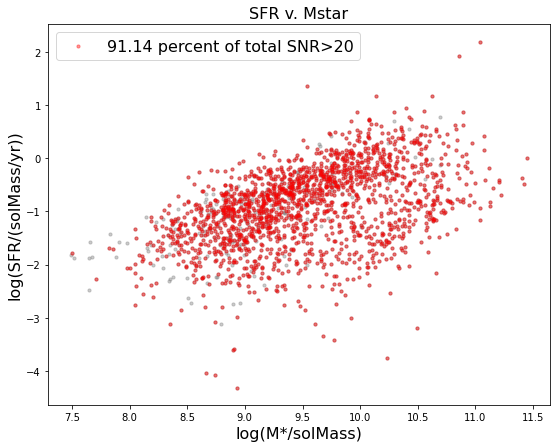

In [8]:
Mstar = mgstab_sample['logmass']  #x axis
SFR = mgstab_sample['logsfr']  #y axis; frequently deriven from WISE C4 data
plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=.4)



#cutting sample with mstar, snr, and sfr according to snr>20
#first, redefine snr_w3_flag using unwisetab_sample
snr_w3 = unwisetab_sample['w3_nanomaggies']/np.sqrt(unwisetab_sample['w3_nanomaggies_ivar'])
snr_w3_flag = (snr_w3 >= 20)

#apply the cut!
hyptab_cut = hyptab_sample[snr_w3_flag]
mgstab_cut = mgstab_sample[snr_w3_flag]
unwisetab_cut = unwisetab_sample[snr_w3_flag]
vfmain_cut = vfmain_sample[snr_w3_flag]
env_cut = envtab_sample[snr_w3_flag]



#annnnd, plot the cut.
Mstar_cut = mgstab_cut['logmass']
SFR_cut = mgstab_cut['logsfr']
plt.scatter(Mstar_cut,SFR_cut,s=10,color='red',alpha=0.4,label='%.2f percent of total SNR>20'%(len(Mstar_cut)/len(Mstar)*100))
plt.legend(fontsize=16)
plt.xlabel('log(M*/solMass)',fontsize=16)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=16)
plt.title('SFR v. Mstar', fontsize=16)

print('Percentage of subsample with SNR>20 relative to sample with w3 SNR:','%.2f'%(len(Mstar_cut)/len(Mstar)*100)+'%')

Text(0, 0.5, '# Galaxies')

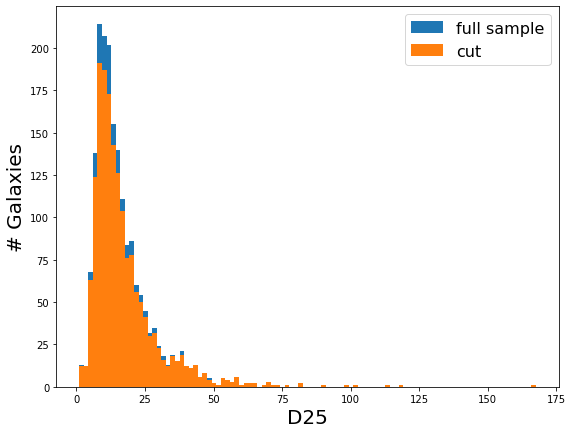

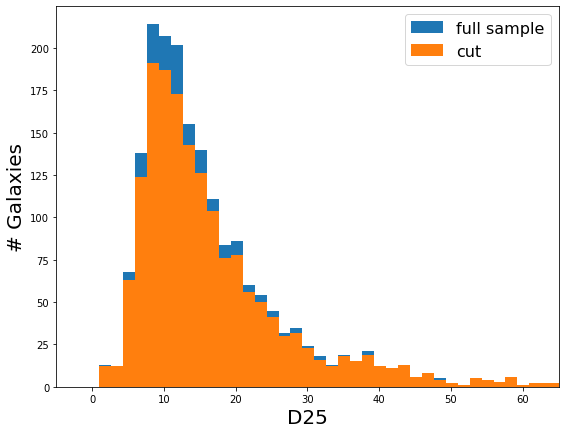

In [9]:
#the following includes only galaxies with snr entries

D25 = 10**(hyptab_sample['logd25'])
D25_cut = 10**(hyptab_cut['logd25'])

plt.figure(figsize=(9,7))
ax = plt.hist(D25,bins=100,label='full sample')
ax2 = plt.hist(D25_cut,bins=100,label='cut')
plt.legend(fontsize=16)
plt.xlabel('D25',fontsize=20)
plt.ylabel('# Galaxies',fontsize=20)

plt.figure(figsize=(9,7))
ax = plt.hist(D25,bins=100,label='full sample')
ax2 = plt.hist(D25_cut,bins=100,label='cut')
plt.xlim(-5,65)
plt.legend(fontsize=16)
plt.xlabel('D25',fontsize=20)
plt.ylabel('# Galaxies',fontsize=20)

## Even with the correction to ensure only galaxies with SNR entries in the catalog were considered, there are a few galaxies with SNR < 20 lying on the main sequence:

166


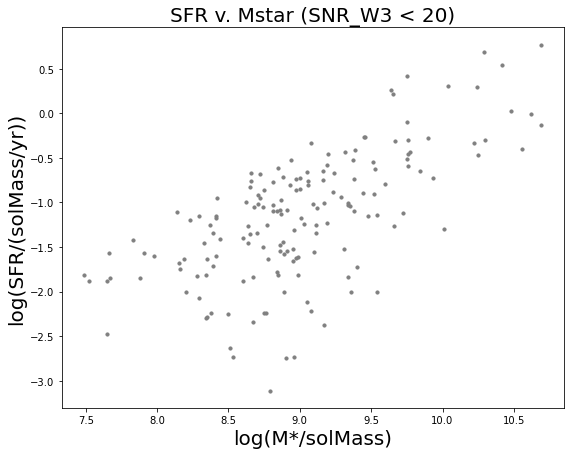

In [10]:
#ONLY PLOT GALAXIES FROM CUT SAMPLE WITH SNR


#from above,
snr_w3 = unwisetab_sample['w3_nanomaggies']/np.sqrt(unwisetab_sample['w3_nanomaggies_ivar'])

snr_ms_flag = (snr_w3 < 20)
mgs_sample = mgstab_sample[snr_ms_flag]
hyp_sample = hyptab_sample[snr_ms_flag]
vf_sample = vfmain_sample[snr_ms_flag]
env_sample = envtab_sample[snr_ms_flag]

Mstar = mgs_sample['logmass']
SFR = mgs_sample['logsfr']


plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=1)
plt.xlabel('log(M*/solMass)',fontsize=20)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=20)
plt.title('SFR v. Mstar (SNR_W3 < 20)', fontsize=20)
print(len(Mstar))

## Let's investigate.
From Trello,
1. For a region of SFR-Mstar in the middle of the main sequence, make a histogram of optical sizes for SNR(W3>20) and overlay it on the histogram in the same region for SNR(W3)<20. 
2. For the same sets of objects as in the previous item, make some cutouts at SNR>20 and SNR<20 and see if you can spot differences. Make sure the cutouts have the same dimensions. 

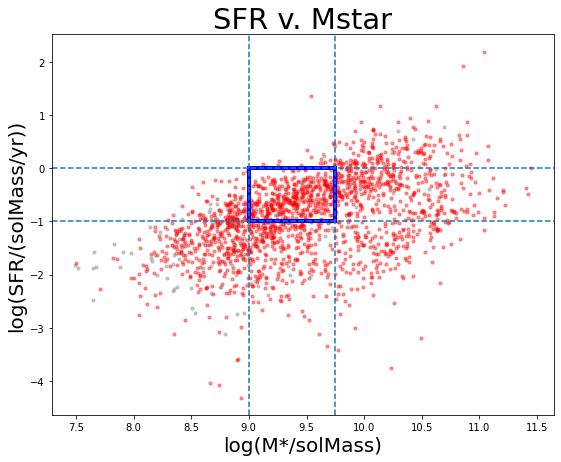

In [11]:
#I am unsure about how to best isolate the main sequence, so I will trace a section of the figure's center
#and have a look at the enclosed galaxies.
#see five cells above for sample cut definitions



#plotting full sample
plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=.4)

#plotting subsample
plt.scatter(Mstar_cut,SFR_cut,s=10,color='red',alpha=0.4)
plt.xlabel('log(M*/solMass)',fontsize=20)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=20)
plt.title('SFR v. Mstar', fontsize=29)

#adding rectangle to isolate a section of main sequence galaxies
plt.axhline(0,linestyle='--')
plt.axhline(-1,linestyle='--')
plt.axvline(9,linestyle='--')
plt.axvline(9.75,linestyle='--')
#add a bit of flair...
rectangle = plt.Rectangle((9, -1.),9.75-9,0-(-1.), linewidth=4, edgecolor='b', facecolor='none',fill=False)
plt.gca().add_patch(rectangle)

In [12]:
#yet another set of flags. :-)
#mgs_sample for galaxies with SNR<20
Mstar = mgs_sample['logmass']
SFR = mgs_sample['logsfr']
cut_flag_sample = (Mstar>=9) & (Mstar<=9.75) & (SFR>=-1) & (SFR<=0)
cut_flag_subsample = (Mstar_cut>=9) & (Mstar_cut<=9.75) & (SFR_cut>=-1) & (SFR_cut<=0)
#galaxies SNR<20
hyp_sample_cut_less20 = hyp_sample[cut_flag_sample]
vf_sample_cut_less20 = vf_sample[cut_flag_sample]
env_sample_less20 = env_sample[cut_flag_sample]
#galaxies SNR>20
hyp_sample_cut_more20 = hyptab_cut[cut_flag_subsample]
vf_sample_cut_more20 = vfmain_cut[cut_flag_subsample]
env_sample_more20 = env_cut[cut_flag_subsample]

print('# galaxies with SNR<20 in rectangle:',len(hyp_sample_cut_less20))
print('# galaxies with SNR>20 in rectangle:',len(hyp_sample_cut_more20))

# galaxies with SNR<20 in rectangle: 27
# galaxies with SNR>20 in rectangle: 383


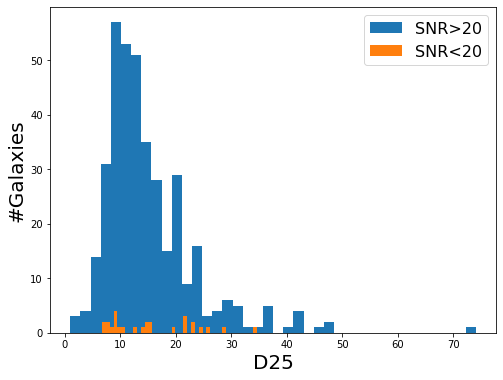

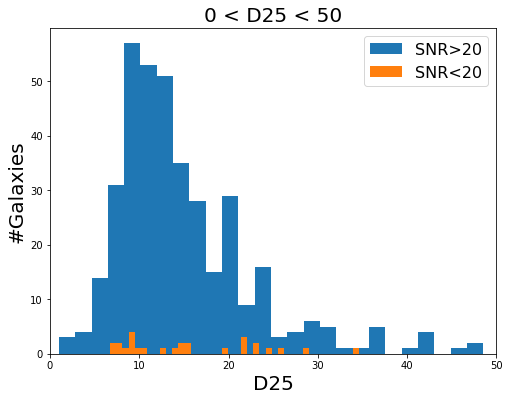

In [13]:
#defining D25 for each subsample type
#there appear to be D25 nan entries as well, but they do not appear in the histogram (evidently). As such,
#I have no desire to eliminate them with YET ANOTHER set of flags.
D25_less20 = 10**(hyp_sample_cut_less20['logd25'])
D25_more20 = 10**(hyp_sample_cut_more20['logd25'])

plt.figure(figsize=(8,6))
plt.hist(D25_more20,bins=40,label='SNR>20')
plt.hist(D25_less20,bins=40,label='SNR<20')
plt.xlabel('D25',fontsize=20)
plt.ylabel('#Galaxies',fontsize=20)
plt.legend(fontsize=16)

#magnifying on 0 < D25 < 50
plt.figure(figsize=(8,6))
plt.hist(D25_more20,bins=40,label='SNR>20')
plt.hist(D25_less20,bins=40,label='SNR<20')
plt.xlabel('D25',fontsize=20)
plt.ylabel('#Galaxies',fontsize=20)
plt.xlim(0,50)
plt.title('0 < D25 < 50',fontsize=20)
plt.legend(fontsize=16)

--------

### Annnnd now, we shall have a look at a few optical cutouts of SNR>20 vs. SNR<20 galaxies featured in the histogram/rectangle, using the Legacy Survey Viewer. See companion Google Doc.

**BE SURE CUTOUT DIMENSIONS MATCH!**

In [14]:
#create .txt files of >20, <20 galaxies. Will use for website purposes.

In [15]:
vf_sample_cut_less20.write('vf_less20.fits')

In [16]:
vf_sample_cut_more20.write('vf_more20.fits')

In [17]:
#isolate where unWISE images are grabbed (see virgowise repository..?)
#change to WISE_SNR_less20 directory 
#wget galaxies listed in hyp .txt file
#then send along this folder to email

In [ ]:
#steps adapted from Rose's virgowise ipynb on github
#*.coadd.fits not found for 2/27 SNR<20 galaxies. Since this is not a tremendous loss, I am not too concerned.
#A simple try/except will do. All at least operate suitably on the virtual machine.

#pull wise image .fits, convert to .png


#with the following, now have access to script that pulls unWISE image from catalog
%run ~/github/virgowise/wisesize.py

os.chdir(homedir+'/github/WISE_SNR_more20')
index_list = []
for i in range(0,len(vf_sample_cut_more20)):
    #ra, dec, size, prefix, band='3'
    try:
        g = galaxy(vf_sample_cut_more20['RA'][i],vf_sample_cut_more20['DEC'][i],vf_sample_cut_more20['radius'][i],
              name=vf_sample_cut_more20['prefix'][i],band='3')
        t = g.get_wise_image()
        wimage,wheader=fits.getdata(g.image,header=True)
        wcs=WCS(wheader)
        plt.figure()
        plt.imshow(wimage,origin='lower')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.savefig('wise%s.png'%vf_sample_cut_more20['VFID'][i])
        plt.close()
    except:
        #galaxies that failed (due to coadding, I assume..?)
        index_list.append(i)
        pass
    
print(index_list)

#all set. Now, send to my primary laptop.

---------

----------

In [49]:
#another question to ask is, at fixed mass and SFR, what governs the SNR distribution of galaxies?
envtab_sample

VFID,flag_clus,flag_fil,flag_isol,flag_gro,flag_clus_k
bytes8,float64,float64,float64,float64,float64
VFID0005,0.0,0.0,1.0,0.0,1.0
VFID0052,0.0,0.0,1.0,0.0,0.0
VFID0076,0.0,0.0,0.0,2.0,0.0
VFID0078,0.0,0.0,0.0,2.0,0.0
VFID0079,0.0,0.0,0.0,2.0,0.0
VFID0080,0.0,0.0,0.0,2.0,0.0
VFID0081,0.0,0.0,0.0,2.0,0.0
VFID0100,0.0,0.0,1.0,0.0,0.0
VFID0109,0.0,0.0,1.0,0.0,0.0


In [87]:
#SNR<20 fractions
#env_sample_less20


#cluster environment
cluster_flag = np.asarray([row[1] for row in env_sample_less20])
cluster_flag = (cluster_flag == True)
cluster_less20 = vf_sample_cut_less20[cluster_flag]

#filament environment
fil_flag = np.asarray([row[2] for row in env_sample_less20])
fil_flag = (fil_flag == True)
fil_less20 = vf_sample_cut_less20[fil_flag]

#Isolated
iso_flag = np.asarray([row[3] for row in env_sample_less20])
iso_flag = (iso_flag == True)
iso_less20 = vf_sample_cut_less20[iso_flag]

#Group environment
group_flag = np.asarray([row[4] for row in env_sample_less20])
group_flag = (group_flag == True)
group_less20 = vf_sample_cut_less20[group_flag]

print('cluster SNR<20 count:',len(cluster_less20)/len(vf_sample_cut_less20))
print('filament SNR<20 count:',len(fil_less20)/len(vf_sample_cut_less20))
print('isolated SNR<20 count:',len(iso_less20)/len(vf_sample_cut_less20))
print('group SNR<20 count:',len(group_less20)/len(vf_sample_cut_less20))

cluster SNR<20 count: 0.14814814814814814
filament SNR<20 count: 0.1111111111111111
isolated SNR<20 count: 0.2962962962962963
group SNR<20 count: 0.2962962962962963


In [88]:
#SNR>20 fractions
#env_sample_more20


#cluster environment
cluster_flag = np.asarray([row[1] for row in env_sample_more20])
cluster_flag = (cluster_flag == True)
cluster_more20 = vf_sample_cut_more20[cluster_flag]

#filament environment
fil_flag = np.asarray([row[2] for row in env_sample_more20])
fil_flag = (fil_flag == True)
fil_more20 = vf_sample_cut_more20[fil_flag]

#Isolated
iso_flag = np.asarray([row[3] for row in env_sample_more20])
iso_flag = (iso_flag == True)
iso_more20 = vf_sample_cut_more20[iso_flag]

#Group environment
group_flag = np.asarray([row[4] for row in env_sample_more20])
group_flag = (group_flag == True)
group_more20 = vf_sample_cut_more20[group_flag]

print('cluster SNR>20 count:',len(cluster_more20)/len(vf_sample_cut_more20))
print('filament SNR>20 count:',len(fil_more20)/len(vf_sample_cut_more20))
print('isolated SNR>20 count:',len(iso_more20)/len(vf_sample_cut_more20))
print('group SNR>20 count:',len(group_more20)/len(vf_sample_cut_more20))

cluster SNR>20 count: 0.09399477806788512
filament SNR>20 count: 0.23237597911227154
isolated SNR>20 count: 0.4360313315926893
group SNR>20 count: 0.26631853785900783


-------

------

-------

### USE INSTEAD THE Z0MGS TABLE FOR SNR DATA (AS OPPOSED TO THE SCHLAFLY+2019 UNWISE DATA ABOVE.
Yes, I copy-pasted many bits of the code.

In [7]:
homedir = os.getenv("HOME")
tabledir = homedir+'/Desktop/v1-20210308/'

vfmain = Table.read(tabledir+'vf_north_v1_main.fits')
hyptab = Table.read(tabledir+'vf_north_v1_hyperleda.fits')
mgstab = Table.read(tabledir+'vf_north_v1_z0mgs.fits')
envtab = Table.read(tabledir+'/vf_north_v1_main_envsummary_Kourkchi.fits')

snr_w3 = mgstab['flux_wise3']/mgstab['std_flux_wise3']
snr_w3_flag = (snr_w3 >= 20)

#sample cuts with snr_w3_flag
vfmain_cut = vfmain[snr_w3_flag]
hyptab_cut = hyptab[snr_w3_flag]
mgstab_cut = mgstab[snr_w3_flag]

print(len(mgstab_cut))

1590


In [9]:
#n=0
#for i in snr_w3[0:451]:
#    print(vfmain['VFID'][n],i)
#    n+=1

In [3]:
#The galaxy subsample with SNR>20 is considerably lower here (by a factor of about three)

#########

#Still many NaN entries. Here's hoping for overlap among the mgstab galaxies.

flag_test_w3 = []      #for later
num_nan_w3 = 0
for i in mgstab['flux_wise3']:
    if str(np.min(mgstab['flux_wise3'])) == str(i):
        num_nan_w3 += 1
        flag_test_w3.append(0)
    else:
        flag_test_w3.append(1)
print('w3 num_nan for full sample:',num_nan_w3)



num_nan_mass = 0
for i in mgstab['logmass']:
    if str(np.min(mgstab['logmass'])) == str(i):
        num_nan_mass += 1

print('Mstar num_nan for full sample:',num_nan_mass)



num_nan_sfr = 0
for i in mgstab['logsfr']:
    if str(np.min(mgstab['logsfr'])) == str(i):
        num_nan_sfr += 1

print('SFR num_nan for full sample:',num_nan_sfr)



num_nan_d25 = 0
for i in hyptab['logd25']:
    if str(np.min(hyptab['logd25'])) == str(i):
        num_nan_d25 += 1

print('d25 num_nan for full sample:',num_nan_d25)

w3 num_nan for full sample: 4426
Mstar num_nan for full sample: 4422
SFR num_nan for full sample: 4532
d25 num_nan for full sample: 904


In [4]:
#cutting full sample according to entries with snr, sfr, AND mstar

snr_cut_flag = np.asarray(flag_test_w3)
#the line below is effectively equivalent to "snr_cut_flag = bool(snr_cut_flag)"
snr_cut_flag = np.asarray((snr_cut_flag > 0).tolist())

#cut full sample to only include galaxies with snr entries
hyptab_sample = hyptab[snr_cut_flag]
mgstab_sample = mgstab[snr_cut_flag]
vfmain_sample = vfmain[snr_cut_flag]
envtab_sample = envtab[snr_cut_flag]

#do likewise for sfr
flag_test_sfr = []
for i in mgstab_sample['logsfr']:
    if str(np.min(mgstab_sample['logsfr'])) == str(i):
        flag_test_sfr.append(0)
    else:
        flag_test_sfr.append(1)      
        
sfr_cut_flag = np.asarray(flag_test_sfr)
sfr_cut_flag = np.asarray((sfr_cut_flag > 0).tolist())

#update subsamples
hyptab_sample = hyptab_sample[sfr_cut_flag]
mgstab_sample = mgstab_sample[sfr_cut_flag]
vfmain_sample = vfmain_sample[sfr_cut_flag]
envtab_sample = envtab_sample[sfr_cut_flag]


#and likewise for mass
flag_test_mass = []
for i in mgstab_sample['logmass']:
    if str(np.min(mgstab_sample['logmass'])) == str(i):
        flag_test_mass.append(0)
    else:
        flag_test_mass.append(1)       
        
Mstar_cut_flag = np.asarray(flag_test_mass)
Mstar_cut_flag = np.asarray((Mstar_cut_flag > 0).tolist())

#update subsamples
hyptab_sample = hyptab_sample[Mstar_cut_flag]
mgstab_sample = mgstab_sample[Mstar_cut_flag]
vfmain_sample = vfmain_sample[Mstar_cut_flag]
envtab_sample = envtab_sample[Mstar_cut_flag]


print('galaxies with Mstar, w3, AND sfr:',len(mgstab_sample['logmass']))
print('total number of galaxies in sample:',len(mgstab))

galaxies with Mstar, w3, AND sfr: 2259
total number of galaxies in sample: 6797


Percentage of subsample with SNR>20 relative to sample with w3 SNR: 69.90%


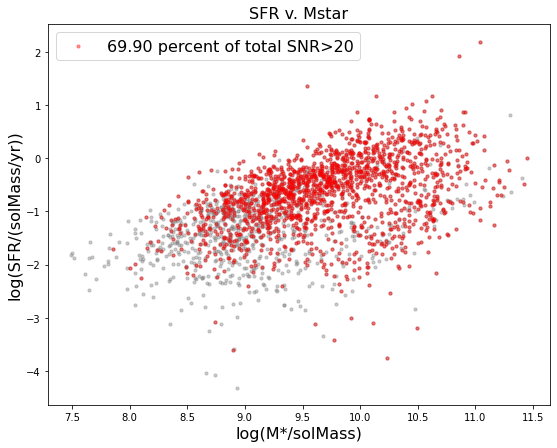

In [5]:
Mstar = mgstab_sample['logmass']  #x axis
SFR = mgstab_sample['logsfr']  #y axis; frequently deriven from WISE C4 data
plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=.4)

#redefine SNR cut using subsamples from previous cell
snr_w3 = mgstab_sample['flux_wise3']/mgstab_sample['std_flux_wise3']
snr_w3_flag = (snr_w3 >= 20)


#apply the cut!
hyptab_cut = hyptab_sample[snr_w3_flag]
mgstab_cut = mgstab_sample[snr_w3_flag]
vfmain_cut = vfmain_sample[snr_w3_flag]


#annnnd, plot the cut overlay.
Mstar_cut = mgstab_cut['logmass']
SFR_cut = mgstab_cut['logsfr']
plt.scatter(Mstar_cut,SFR_cut,s=10,color='red',alpha=0.4,label='%.2f percent of total SNR>20'%(len(Mstar_cut)/len(Mstar)*100))
plt.legend(fontsize=16)
plt.xlabel('log(M*/solMass)',fontsize=16)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=16)
plt.title('SFR v. Mstar', fontsize=16)

print('Percentage of subsample with SNR>20 relative to sample with w3 SNR:','%.2f'%(len(Mstar_cut)/len(Mstar)*100)+'%')

680


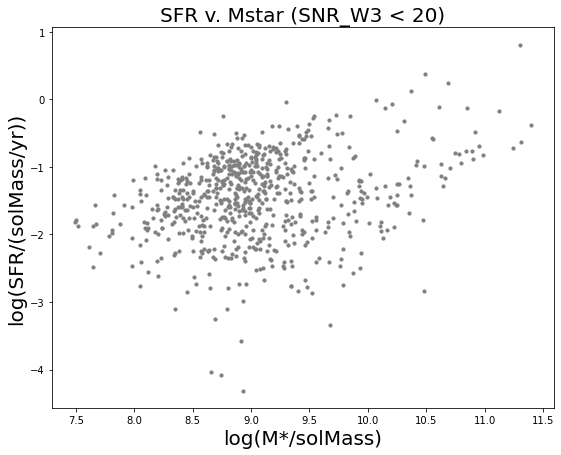

In [6]:
#ONLY PLOT GALAXIES FROM CUT SAMPLE WITH SNR


snr_ms_flag = (snr_w3 < 20)
mgs_sample = mgstab_sample[snr_ms_flag]
hyp_sample = hyptab_sample[snr_ms_flag]
vf_sample = vfmain_sample[snr_ms_flag]

Mstar = mgs_sample['logmass']
SFR = mgs_sample['logsfr']


plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=1)
plt.xlabel('log(M*/solMass)',fontsize=20)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=20)
plt.title('SFR v. Mstar (SNR_W3 < 20)', fontsize=20)
print(len(Mstar))

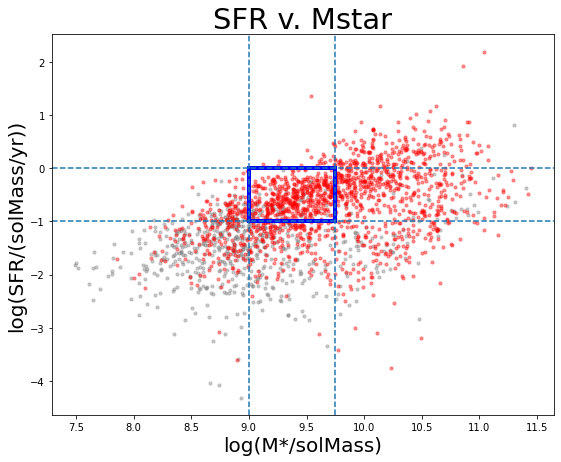

In [7]:
#plotting full sample
plt.figure(figsize=(9,7))
plt.scatter(Mstar,SFR,s=10,color='gray',alpha=.4)

#plotting subsample
plt.scatter(Mstar_cut,SFR_cut,s=10,color='red',alpha=0.4)
plt.xlabel('log(M*/solMass)',fontsize=20)
plt.ylabel('log(SFR/(solMass/yr))',fontsize=20)
plt.title('SFR v. Mstar', fontsize=29)

#adding rectangle to isolate a section of main sequence galaxies
plt.axhline(0,linestyle='--')
plt.axhline(-1,linestyle='--')
plt.axvline(9,linestyle='--')
plt.axvline(9.75,linestyle='--')
#add a bit of flair...
rectangle = plt.Rectangle((9, -1.),9.75-9,0-(-1.), linewidth=4, edgecolor='b', facecolor='none',fill=False)
plt.gca().add_patch(rectangle)

In [8]:
#yet another set of flags. :-)
#mgs_sample for galaxies with SNR<20
Mstar = mgs_sample['logmass']
SFR = mgs_sample['logsfr']
cut_flag_sample = (Mstar>=9) & (Mstar<=9.75) & (SFR>=-1) & (SFR<=0)
cut_flag_subsample = (Mstar_cut>=9) & (Mstar_cut<=9.75) & (SFR_cut>=-1) & (SFR_cut<=0)
#galaxies SNR<20
hyp_sample_cut_less20 = hyp_sample[cut_flag_sample]
vf_sample_cut_less20 = vf_sample[cut_flag_sample]
#galaxies SNR>20
hyp_sample_cut_more20 = hyptab_cut[cut_flag_subsample]
vf_sample_cut_more20 = vfmain_cut[cut_flag_subsample]

print('# galaxies with SNR<20 in rectangle:',len(hyp_sample_cut_less20))
print('# galaxies with SNR>20 in rectangle:',len(hyp_sample_cut_more20))

# galaxies with SNR<20 in rectangle: 73
# galaxies with SNR>20 in rectangle: 438


In [9]:
#with the following, now have access to script that pulls unWISE image from catalog
%run ~/github/virgowise/wisesize.py

<Figure size 432x288 with 0 Axes>

In [46]:
#steps adapted from Rose's virgowise ipynb on github
#*.coadd.fits not found for 2/27 SNR<20 galaxies. Since this is not a tremendous loss, I am not too concerned.
#A simple try/except will do. All at least operate suitably on the virtual machine.

#pull wise image .fits, convert to .png
#EXAMPLE OF USE: grab_wise_images('more','figures_more')
def grab_wise_images(more_or_less_str, output_dir_str):
    
    #change to correct directory
    os.chdir(homedir+'/github/WISE_SNR_'+more_or_less_str+'20')
    
    #create subdirectory in which the .png images will be relocated
    os.mkdir(output_dir_str+'_png')
    os.mkdir(output_dir_str+'_fits')
    
    #following will be indices to EXCLUDE
    index_list = []

    #let's try 30 each.
    if more_or_less_str == 'more':
        vf = vf_sample_cut_more20[0:30]
        vf.write('vfmain_more.fits')
        print('aye')
    if more_or_less_str == 'less':
        vf = vf_sample_cut_less20[0:30]
        vf.write('vfmain_less.fits')
        print('nay')
    for i in range(0,len(vf)):
        #ra, dec, size, prefix, band='3'
        try:
            g = galaxy(vf['RA'][i],vf['DEC'][i],vf['radius'][i],name=vf['prefix'][i],band='3')
            t = g.get_wise_image()
            wimage,wheader=fits.getdata(g.image,header=True)
            wcs=WCS(wheader)
            plt.figure()
            plt.imshow(wimage,origin='lower')
            plt.xlabel('RA')
            plt.ylabel('DEC')
            plt.savefig('wise%s.png'%vf['VFID'][i])
            plt.close()
            
        except:
            #galaxies that failed (due to coadding, I assume..?)
            index_list.append(i)
            pass
    
    #move .png, cutout .fits files to designated directories
    os.system('mv '+ '*png' + ' '+ str(output_dir_str)+'_png')
    os.system('mv '+ '*img-m.fits' + ' '+ str(output_dir_str)+'_fits')    
    print(index_list)

#all set. Now, send to my primary laptop.

In [ ]:
grab_wise_images('more','figures_more')